# Project Part 1

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/rjbeer/CS39AA-Project/blob/main/Project%20Part%201.ipynb)

## 1.Introduction

The purpose of this project is to explore the effects of different hyperparameters, in terms of accuracy, on their respective models. I will start with random forest and compare it side by side to other models. It should be noted this is an deeper analysis of internal hyperperameraters and may or may not delve into hidden layers, dropout rates, etc., and is purely informational. The results from this project are not meant to be used as a final model and are more intended to be used as a potential starting point when building Machine Learning or Deep Learning models.

The chosen dataset for this project is "Starbucks Reviews Dataset" published by Kaggle user Harshal H on kaggle at https://www.kaggle.com/datasets/harshalhonde/starbucks-reviews-dataset.

## Important Note

The code below does run fully on kaggle, however, if the Run All button is selected and there is an error then the dataset must be added in order to run it. To do this, click on the link above to view the dataset. Then on the notebook section on the right, click on add data, which should bring up a recently viewed datasets section where the Starbucks Reviews Dataset can be located. Click on the plus sign and add the dataset. Afterwards the code will work. Unfortunately no way of linking the file to the relevant github account was found.

## Method

The models will take as input the review itself and predict wether or not the review is either a positive or negative one. As mentioned earlier this will be first be done with a random forest model, and then with other models, likely Decision Tree Classifier, or Gradient boosting classifier. Though there are other candidates to explore, those three are the most likely candidates to use for the purposes of this particular project.After getting the initial accuracy hyperparameters such as number of leaves, tree depth, etc. will be adjusted and tuned for higher accuracy. 

After all the data has been collected the original hyperparameters and the final hyperparameters will be posted. The process will be repeated for the second, and potentially third, chosen models. The accuracy score of all hyperparameter values tested and their resulting accuracy will also be posted, but will not be run with the code as this can take quite a bit time depending on the model. Instead they will be tested and the data collected will be used to show how impactful by comparison to others the individual hyperparameter is. 

## 2. Exploratory Data Analysis

To begin the dataset must be explored to better understand what the data looks like. This will then be used to determine what data will be used, and of that data what can be used to train the chosen models.

In [1]:
import pandas as pd
import numpy as np

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# ...

/kaggle/input/starbucks-reviews-dataset/reviews_data.csv


In [2]:
input_data_path = '/kaggle/input/starbucks-reviews-dataset/'
training_data_file = 'reviews_data.csv'
df = pd.read_csv(input_data_path + training_data_file)
df.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         850 non-null    object 
 1   location     850 non-null    object 
 2   Date         850 non-null    object 
 3   Rating       705 non-null    float64
 4   Review       850 non-null    object 
 5   Image_Links  850 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.0+ KB


In [4]:
df.isnull().sum()

name             0
location         0
Date             0
Rating         145
Review           0
Image_Links      0
dtype: int64

In [5]:
df.shape

(850, 6)

In [6]:
df.columns.tolist()

['name', 'location', 'Date', 'Rating', 'Review', 'Image_Links']



The first peek into the dataset shows us quite a bit. First, the data consists of 6 columns as listed above. For the purposes of this model the only columns that will be used are 'Rating' and 'Review'as they are the two columns that give the relevant data. 'Name', 'location', and 'Image_Links' are irrellevent to what we want to look at, and though 'Date' may yeild something useful, perhaps there was a trend towards positive or negative reviews depending on the year, it is also not needed as that is beyond the scope of this particular project. 
Second, there are 850 entries in the dataset, of which there are 705 non-null values in the ratings column. The null data, consisting of 145 total entries, will be removed so that there is less chance that bad data is introduced, potentially decreasing the models predictions.

A bargraph of the 'ratings' collumn will be produced to reveal the the distribution of these data.
The method for producing the bargraph and for cleaning the data later on was produced by Kaggle user Neelabh Somani will be used to show us the data. The original code and method for doing this is located at:

https://www.kaggle.com/code/neelabhsomani/starbucks-sentiment-analysis-81-accuracy,
accessed on 11/08/2023

Their method for sorting the data, that being into 0 for negative reviews and 1 for positive reviews, will be used as well. The details of this sorting will be that if the rating is lower than 3 that review will be considered negative, and equal to or greater than 3 will be a positive review.

In [7]:
X_target = df[df['Rating'].isnull()]
X_target.head()

,name,location,Date,Rating,Review,Image_Links
704,James,"Kansas City, MO","Reviewed July 25, 2011",NaN,I just wanted to amend my email the I sent to ...,['No Images']
705,James,"Kansas City, MO","Reviewed July 25, 2011",NaN,"Recently, I have gone to your Starbucks at Bar...",['No Images']
706,Mike,"Revere, ma","Reviewed June 26, 2011",NaN,Upon my first visit to this location on my way...,['No Images']
707,Hughes,"Macclesfield, Other","Reviewed Jan. 13, 2011",NaN,"Recently, British Royal Marines in Iraq wrote ...",['No Images']
708,Sherrilynn,"Jenison, MI","Reviewed Jan. 4, 2011",NaN,"On the way to catch our plane, we got a medium...",['No Images']


In [8]:
X_target.shape

(145, 6)

In [9]:
df_copy = df.copy(deep=True)
df_copy.dropna(inplace=True)
df_copy.isnull().sum()

name           0
location       0
Date           0
Rating         0
Review         0
Image_Links    0
dtype: int64

Above a copy of the null data that will be removed is created as well as a deep copy of our original data that we can safe manipulate and clean without potentially changing the original dataset used. The copy of the data to be removed may be needed at a later time so we will make sure to keep ahold of that data in the possibility that it is needed.

The deep copy then has the null data removed. Below the new shape is revealed and there are now only 705 entries that will be used, matching the number previously stated. We can then proceed to look at the data distribution.

In [10]:
df_copy.shape

(705, 6)

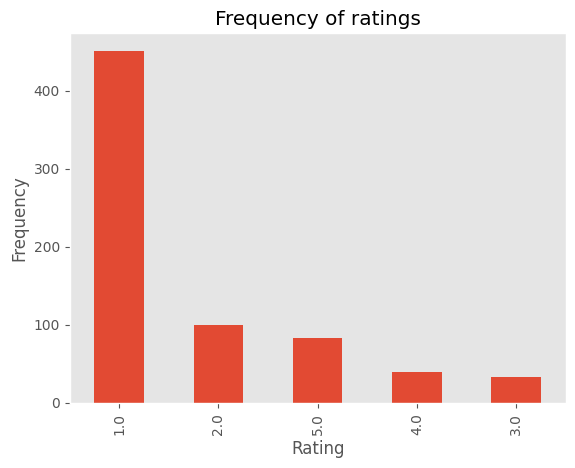

In [11]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
freq = df_copy['Rating'].value_counts()
freq.plot(kind='bar', title='Frequency of ratings', xlabel = 'Rating', ylabel = 'Frequency')
plt.grid()
plt.show()

From the graph above it can be seen that the reviews are very unbalanced, with over half of the total of ratings being 1 star ratings. There may not be avoiding a clear bias without trimming the data. For the purposes of this project we will use the data as is at first and then make adjustments to the data set if necessary.